In [87]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import csv
import time

In [88]:
all_data = []

In [89]:
# read in house dataset
X_training = []
y_training = []
header = []
c = 0
with open("DataSets/house_att.csv","r") as file:
    r = csv.reader(file)
    for row in r:
        if(c == 0):
            header = row
            c+=1
            continue
        X_training.append([float(x) for x in row])
        
with open("DataSets/house_price.csv","r") as file:
    r = csv.reader(file)
    for row in r:
        y_training.append(float(row[0]))

        
print(len(X_training))
print(len(y_training))
X_train, X_test, y_train, y_test = train_test_split(X_training, y_training, test_size=0.2) # 80% training and 20% testing data
all_data.append([X_train, X_test, y_train, y_test,header])
print(X_training)
print(y_training)

10000
10000
[[89.6, 74.0, 2.0, 8.0], [72.5, 83.0, 1.0, 8.0], [27.1, 62.0, 3.0, 4.0], [84.4, 67.0, 0.0, 8.0], [67.5, 48.0, 6.0, 7.0], [31.9, 78.0, 10.0, 4.0], [66.7, 77.0, 0.0, 5.0], [32.0, 51.0, 0.0, 7.0], [47.9, 67.0, 0.0, 7.0], [74.3, 73.0, 2.0, 8.0], [25.5, 73.0, 9.0, 8.0], [79.0, 38.0, 6.0, 3.0], [18.0, 83.0, 2.0, 5.0], [63.3, 58.0, 0.0, 8.0], [1.6, 83.0, 5.0, 3.0], [99.4, 61.0, 3.0, 3.0], [16.3, 45.0, 3.0, 4.0], [26.5, 58.0, 8.0, 4.0], [61.0, 35.0, 10.0, 5.0], [1.1, 84.0, 4.0, 6.0], [76.2, 85.0, 7.0, 4.0], [52.0, 70.0, 0.0, 6.0], [48.0, 44.0, 3.0, 4.0], [61.9, 45.0, 4.0, 8.0], [81.8, 41.0, 10.0, 5.0], [49.4, 74.0, 10.0, 8.0], [43.4, 72.0, 0.0, 6.0], [92.0, 33.0, 10.0, 4.0], [14.1, 64.0, 4.0, 5.0], [6.6, 64.0, 2.0, 3.0], [88.2, 56.0, 1.0, 7.0], [29.3, 85.0, 9.0, 3.0], [74.8, 59.0, 9.0, 7.0], [18.0, 30.0, 7.0, 5.0], [10.6, 78.0, 2.0, 5.0], [80.0, 77.0, 6.0, 3.0], [29.2, 78.0, 9.0, 4.0], [9.1, 95.0, 8.0, 7.0], [24.0, 45.0, 9.0, 5.0], [89.8, 43.0, 10.0, 8.0], [27.3, 36.0, 0.0, 8.0], [

In [90]:
#Sort dataset by an attribute.(increasing order)
def sort_f3(X,y,column):
    

  
    '''sortf = zip(X,y)
    sortf= sorted(sortf,key = lambda x:x[0][column])
    X = [x for x,y in sortf]
    y = [y for x,y in sortf]'''
    
    
    for i in range(len(X)-1):
        temp = i
        for j in range(i,len(X)):
            
            

            if(X[j][column]<X[temp][column]):
                temp = j
        if(temp != i):
            tmp = X[i]
            X[i] = X[temp]
            X[temp] = tmp

            tmp = y[i]
            y[i] = y[temp]
            y[temp] = tmp
    return X,y

In [91]:
#Sort dataset by an attribute.(increasing order)
def sort_f2(X,y,column):
    

  
    sortf = zip(X,y)
    sortf= sorted(sortf,key = lambda x:x[0][column])
    X = [x for x,y in sortf]
    y = [y for x,y in sortf]
    
    
    
    return X,y

In [92]:
#Sort dataset by an attribute.(increasing order)
def sort_f(X,y,column):
    

    X = np.array(X)
    y = np.array(y)
    p = X[:,column].argsort()
    X = X[p]
    y = y[p]

    return X.tolist(),y.tolist()


In [93]:
class Tree:
    def __init__(self,X,feature_names,labels):
        
        self.X = X
        self.num_of_nodes = 0
        self.currentsplit = 0
        self.split_result = 0
        self.feature_names = feature_names #coloum names
        self.labels = labels#y
        self.catagories = set(labels)
        self.nodes = []
        self.split = 0
        self.leaf = 0
        self.steps = [0,0,0]
        self.std = 0
        

In [94]:
class Node:
    def __init__(self,labels,X,feature_ids):
        
        self.split_result = 0
        self.split = 0 #which column / which feature id
        self.feature_ids = feature_ids
        self.labels = labels
        self.X = X
        self.nodes = []
        self.regr = 0
        self.depth = 0
        self.top = 0
        self.bottom = 0
        self.steps = [0,0,0]
        self.std = []
        self.leaf = 0 #true or false

In [95]:
def get_features(X,labels,column,bottom,top):#return splited data
    
    #Return a portion of the dataset, which's attributes is in a certain

    sub_label = [labels[x] for x in range(len(labels)) if X[x][column]<top and X[x][column]>=bottom]
    sub_X = [X[x] for x in range(len(X)) if X[x][column]<top and X[x][column]>=bottom]

        
    return [sub_X,sub_label]

In [96]:
def regression(regr_type,X,y,column,dgr):
    
    
   
    
    X = [ [X[i][column]] for i in range(len(X)) ]

    
    regr = LinearRegression()
    regr.fit(X,y)
    
    
    return regr

In [97]:
def calculate_error(regr,X,y,column,regr_type,dgr):
    
    
    
    X = [ [X[i][column]] for i in range(len(X)) ]
    if(regr_type == 1):
        X = PolynomialFeatures(degree=dgr).fit_transform(X)
    predict = regr.predict(X)

    difference = []
    
    for i in range(len(predict)):
        difference.append( (predict[i]-y[i])**2 )
    error = sum(difference)/len(difference)

  
    return error

In [98]:
def calculate_distance(i,j,column):
    
    
 
    n1 = [ i[0][k][column] for k in range(len(i[0])) ]
    n2 = [ j[0][k][column] for k in range(len(j[0])) ]
    
    
    
    Ni = len(n1)
    Nj = len(n2)
    
    s1i = sum(n1)/Ni
    s1j = sum(n2)/Nj
    
    s2i = sum([x**2 for x in n1])/Ni
    s2j = sum([x**2 for x in n2])/Nj
    
    s3i = sum([x*y for x,y in zip(n1,i[1])])/Ni
    s3j = sum([x*y for x,y in zip(n2,j[1])])/Nj
    
    s4i = sum(i[1])/Ni
    s4j = sum(j[1])/Nj
    
    D = (s1i-s1j)**2 + (s2i-s2j)**2 + (s3i-s3j)**2 +(s4i-s4j)**2
    
    return D

In [99]:
def find_min_distance(sliced_data,column):
    
    dist = 0
    min_dist = -1
    index1 = -1
    index2 = -1
    
    #determine what to merge accordint to the linear regression
    
    for i in range(len(sliced_data)-1):

            dist = calculate_distance(sliced_data[i],sliced_data[i+1],column)
            
            if(min_dist == -1):
                min_dist = dist
                index1 = i
                index2 = i+1
            if(dist<min_dist):
                min_dist = dist
                index1 = i
                index2 = i+1
    
    return index1,index2
    

In [100]:
def merge(sliced_data,regressions,column):
    
   

    index1,index2 = find_min_distance(sliced_data,column)
    

    sliced_data[index1][0] = sliced_data[index1][0]+sliced_data[index2][0]
    sliced_data[index1][1] = sliced_data[index1][1]+sliced_data[index2][1]

    regressions[index1] = regression(0,sliced_data[index1][0],sliced_data[index1][1],column,0)
    
    sliced_data.pop(index2)
    regressions.pop(index2)
    
    return sliced_data,regressions

In [101]:
def calculate_std(data):
    
    #print(data)
    mean = sum(data)/len(data)
    
    variance = 0
    
    for i in data:
        variance += (i-mean)**2
    
    
    return math.sqrt(variance/len(data))

In [102]:
def pre_merge(sliced_data,index,std,column):
    
   

    #index1,index2 = find_min_distance(sliced_data,column)
    std_local = 0
    X = sliced_data[index][0]
    X2 = sliced_data[index+1][0]
    features = [ X[j][column] for j in range(len(X)) ] + [ X2[j][column] for j in range(len(X2)) ]
    std_local += calculate_std(features)


    if(std_local<= std ) :

        sliced_data[index][0] = sliced_data[index][0]+sliced_data[index+1][0]
        sliced_data[index][1] = sliced_data[index][1]+sliced_data[index+1][1]
        sliced_data.pop(index+1)
        return sliced_data
   
    return sliced_data

In [103]:
def get_features2(sliced_data,column):

    features = []

    for i in sliced_data:
        features.append([ i[0][j][column] for j in range(len(i[0])) ])
    
    return features

In [104]:
def calculate_std_avg(features):
    std = 0

    for i in range(len(features)-1):
            std += calculate_std(features[i] + features[i+1])

    std = std/len(features)

    return std

In [105]:
def preprocess(X,labels,column):

    sliced_data = [[ [x] , [y] ] for x,y in zip(X,labels)]

    features = [ [X[j][column]] for j in range(len(X)) ] 
    std = calculate_std_avg(features)

    index = -1

    while(len(sliced_data)>100):
        #print(len(sliced_data))
        #merg
        index += 1
        if(index>=len(sliced_data)-1):
            index = 0
            std = calculate_std_avg(get_features2(sliced_data,column))
            

        sliced_data = pre_merge(sliced_data,index,std,column)
        

    return sliced_data

In [106]:
def find_best_split(X,labels,feature_ids,steps,div):
    
    step = -1

    features = 0 
    svalue = 0
    
    min_error = -1
    min_sliced_data = []
    min_regressions = []
    min_steps = -1
    min_column = -1

    for column in feature_ids:

            
            X,labels = sort_f(X,labels,column)
            features = [ X[j][column] for j in range(len(X)) ] 
            
            sliced_data = []
            regressions = []
            
            #determine the the range of the values
            dist = abs(features[0]-features[-1])
            
            #defien a step size
            step = int(dist/10)
            if(steps[column] > 11 ):
                    continue
            '''if(step < 2):
                step = 1#minimum stepsize
                #After the minimum steps size has benn reached,on an attribute,we not allow for infinite splits
                
            #slice data according to step size
            for k in range(int(features[0]),int(features[-1])+1,step): 

                sliced_data.append(get_features(X,labels,column,k,k+step))
                
                if( len(sliced_data[-1][0]) == 0):

                    
                    sliced_data.pop(-1)
                    continue
                regressions.append( regression( 0,sliced_data[-1][0],sliced_data[-1][1],column,0 ) )'''



            sliced_data = preprocess(X,labels,column)
            #print(len(sliced_data))
            #print(sliced_data[1])
            for i in sliced_data:
                #print(len(i))
                regressions.append( regression( 0,i[0],i[1],column,0 ) )

            #merge the data
        
            while(len(sliced_data)>div):

                sliced_data,regressions = merge(sliced_data,regressions,column)
                #print(len(sliced_data))
                
            
            error = 0
            for i in range(len(sliced_data)):
                
                error += calculate_error(regressions[i],sliced_data[i][0],sliced_data[i][1],column,0,0)
            #sum the error after the split
            #choose min
            
            if(min_error == -1):
                min_sliced_data = sliced_data
                min_regressions = regressions
                min_steps = step
                min_column = column
                min_error = error
                continue
            #choose the splited data with the minimum error
            if(error<min_error):
                min_sliced_data = sliced_data
                min_regressions = regressions
                min_steps = step
                min_column = column
    
    #return split,split_value
    steps[min_column] += 1
    '''if(min_steps < 2 and min_steps>=0):
            steps[min_column] += 1'''
    
    return min_sliced_data,min_regressions,min_column,steps


In [107]:
def build_tree(X,feature_ids,labels,leaf_size,limit,depth,steps,div):
       
    #find the best split for sub_nodes
    #return sub_nodes
    
    split = 0 
    sub_nodes = []
    
    
    st = steps.copy()
    
    #get the best split 
    split_data,split_regression,column,st = find_best_split(X,labels,feature_ids,st,div)
   

    #create objects and inicialize them
    for i,j in zip(split_data,split_regression):

        
        node = Node(i[1],i[0],feature_ids)
        node.split = column  
        
     
       
        node.split_result = i[0][-1][column]
        node.depth = depth
        node.regr = j
        
        node.top = i[0][-1][column]
        node.bottom = i[0][0][column]
        node.steps = st
        node.std.append(calculate_error(node.regr,node.X,node.labels,split,0,3))
        
        
       
        if(len(node.labels) <= leaf_size or calculate_error(node.regr,node.X,node.labels,split,0,3)<1):
            node.leaf = 1
            
            
        else:
            node.leaf = 0
        sub_nodes.append(node)
    

    if(depth == 2000):
        for i in sub_nodes:
            i.leaf = 1
            
        return sub_nodes
    
    depth +=1

    
    leaf =  0
    for i in sub_nodes:

        if(i.leaf == 1):
            leaf +=1
            
            
    if(leaf == len(sub_nodes)):
        print("///////////////////////////")
        '''print([ i.X[j][0] for j in range(len(i.X)) ])
        print([ i.X[j][1] for j in range(len(i.X)) ])
        print([ i.X[j][2] for j in range(len(i.X)) ])
        print([ i.X[j][3] for j in range(len(i.X)) ])'''
        print(calculate_std([ i.X[j][0] for j in range(len(i.X)) ]))
        print(calculate_std([ i.X[j][1] for j in range(len(i.X)) ]))
        print(calculate_std([ i.X[j][2] for j in range(len(i.X)) ]))
        print(calculate_std([ i.X[j][3] for j in range(len(i.X)) ]))
        print(i.labels)
        return sub_nodes
    
    else:
        for node in sub_nodes:

            if(node.leaf == 0):
                
                node.nodes = build_tree(node.X,node.feature_ids,node.labels,leaf_size,limit,depth,node.steps,div)


    return sub_nodes   

In [108]:
def inicialize(X,feature_names,labels,leaf_size,limit,depth,div):
    
    
    feature_ids = [x for x in range(len(feature_names))]
    tree = Tree(X,feature_names,labels)
    steps = []
    for i in feature_ids:
        steps.append(0)
    #start_building
    tree.nodes = build_tree(X,feature_ids,labels,leaf_size,limit,depth,steps,div)
    return tree

In [109]:
forest = []
times = []
#limits = [0.5,0.75,1,1.25,1.5,1.75,2]
divide = [2,3,4,5]


#for each dataset we build a tree and mesure the elapsed time
for i in all_data:
    f = []
    t = []
    for j in divide:
        
        print("-------------------------------------------------------")

        start = time.time()
        tree = inicialize(i[0],i[-1],i[2],15,1,1,j)
        end = time.time()
        f.append(tree)
        print(end-start)
        t.append(end-start)
    forest.append(f)
    times.append(t)

-------------------------------------------------------


///////////////////////////
0.6776309271789384
6.446008098673415
2.9632097875273624
0.0
[71.04427469762692, 81.04427469762692, 75.01203930612091, 81.81570702818529, 82.0672005306815, 75.1163863659264, 73.14963851047138, 80.14963851047138, 72.55241736865231, 73.33180545238822, 73.95333333333333, 73.30181818181819, 79.67496516285154, 72.86544135332772]
///////////////////////////
0.6335525936249403
11.25802183136787
2.8819360776317633
0.0
[62.77527718973079, 71.75940417385777, 67.02302831710992, 70.7025154965971, 65.31150831714591, 64.28007329308008, 62.41050807568877, 64.42997780347466, 68.01305072833802, 67.16819277108434, 68.71713574366225, 66.73500657071902]
///////////////////////////
0.6954628955258895
2.8823067684915684
2.3025583918608867
0.0
[89.27, 90.27253959133004, 90.66142848021893, 92.51403179873643, 92.33166333595081, 87.94141943351178, 89.84620044962749, 87.4973139172839, 91.08139057918315, 89.85476563848543, 91.77098490237486, 92.75206185704236, 95.96545197159956]
///////

KeyboardInterrupt: 

In [ ]:

def predict(node,value):

    if(node.leaf == 1 ):

        
        print(node.std)
        print(node.labels,'labels')
        print(node.steps)
        p = node.regr.predict(np.array(value[node.split]).reshape((1,-1)))
        return p
    else:
        
        c=0
        for i in node.nodes:

            if (i.top>=value[i.split] and i.bottom<=value[i.split]):

                c+=1
                print(node.std)
                p=predict(i,value)
                return p
        if(c == 0):

            try:
                p = node.regr.predict(np.array(value[node.split]).reshape((1,-1)))
                return p
            except:
                return [-1]
            p = node.regr.predict(np.array(value[node.split]).reshape((1,-1)))
            return p



In [ ]:

predicted_value = []#predicted points
difference = []
MSE = []
sum_y = []

all_mse = []

#for each tree we calculate the mean squared error
#all_data = [X_train,X_test,y_train,y_test,header]
for v in range(len(forest)):
    MSE = []
    for i in forest[v]:
        j = all_data[v]
        
        X_test = j[1]
        y_test = j[3]
        pv = []
        error = 0
        mse = 0
        for k in range(len(X_test)): 

            p = predict(i,X_test[k])

          
    
            error += abs(y_test[k]-p[0])
            mse += (y_test[k]-p[0])**2
            pv.append(p)



        sum_y.append(sum(y_test))
        predicted_value.append(pv)
        difference.append(error)
        MSE.append(mse/len(X_test))

    all_mse.append(MSE)
    
    
print(difference)
print(sum_y)

print(all_mse)

with open("Results3/difference_rtln.csv", 'a',newline='') as f:
    # create the csv writer
    writer = csv.writer(f)
   
    # write a row to the csv file
    for row in all_mse:
        writer.writerow(row)
with open("Results3/times_rtln.csv", 'a',newline='') as f:
    # create the csv writer
    writer = csv.writer(f)
    #writer.writerow('\n')
    # write a row to the csv file
    for row in times:
        writer.writerow(row)
       

0
[11227884.333384776]
[627.4878049451172]
[60.774672054964775]
[58.78183801701007]
[54.28980127059477]
[45.349166935376815]
[48.35836075058829]
[237.81981750507708]
[208.33202379198664]
[7.746977248853068]
[7.537929303850692]
[2.6126194856418654]
[275.9992751655962, 272.2280262331585, 277.45752191274016, 275.70483374069715, 275.80010786525906, 272.9779244516442, 275.75461108844024, 277.05033460669205, 275.97701131235635, 273.8420663571867] labels
[7, 1, 1, 3]
0
[11227884.333384776]
[7066941.451480576]
[3928115.874638247]
[387.3621040495649]
[103.7736720723203]
[51.01673327775363]
[169.01599572660726]
[38.428896940305734]
[44.37259276297639]
[12.134386141357314]
[12.960837207178317]
[0.0]
[171.7073595884027] labels
[4, 2, 0, 6]
0
[78125677.43856665]
[621.3561147462459]
[50.267818662808416]
[49.49222965753745]
[67.91927823112391]
[331.58787804733174]
[144.54872251953677]
[11.935814098190313]
[14.765888928494203]
[6444.084140357005]
[866.597896055185]
[76.95016863885033]
[637.90856129437

2000
621265.9621497449


Text(0.5, 1.0, 'Test data')

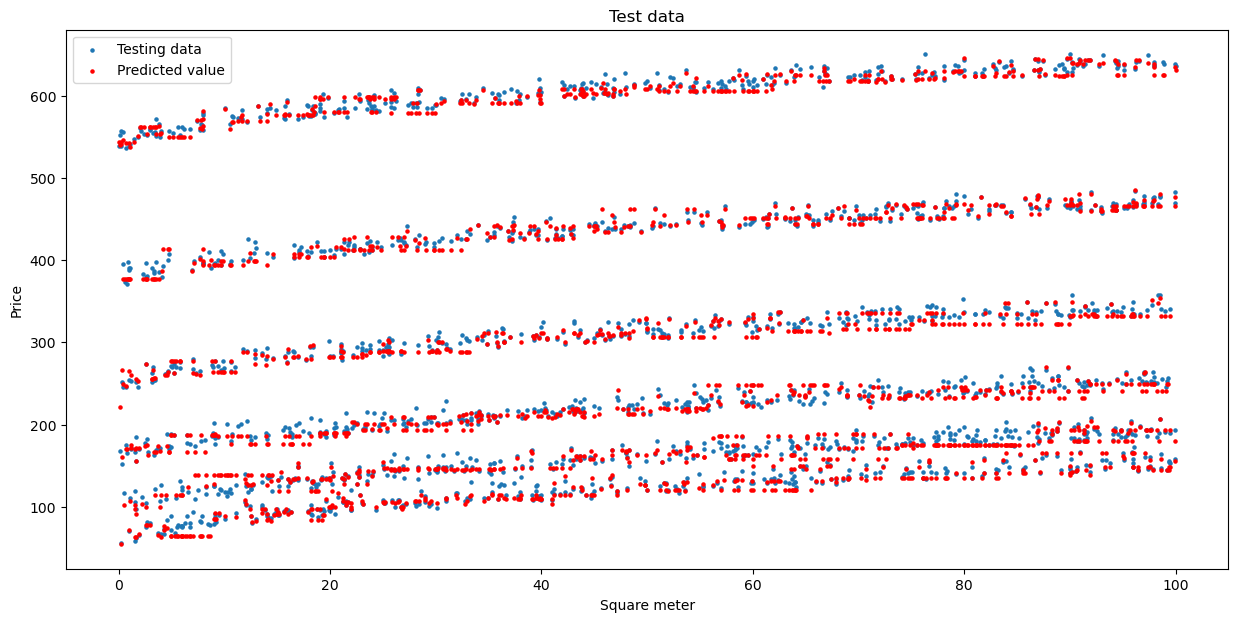

In [ ]:
plt.rcParams["figure.figsize"] = (15,7)
print(len(y_test))
#print(len(predicted_value[14]))
plt.scatter([ X_test[i][0] for i in range(len(X_test)) ],y_test,s=5)
plt.scatter([ X_test[i][0] for i in range(len(X_test)) ], predicted_value[0],c="r",s=5)
plt.legend(["Testing data" , "Predicted value"])
print(sum(y_test))
plt.xlabel("Square meter")
plt.ylabel("Price")
plt.title("Test data")